In [1]:
from main import *
from visualization import *

%matplotlib inline
plt.rcParams['font.size'] = 6

# Setting paths

In [2]:
top_directory = '/media/anleg84/Backup Plus/CERVO/Data/Networks2024/'
atlas_path = '/home/anleg84/Documents/Atlas/Mapzebrain/'

In [3]:
atlas = MapzebrainAtlas(atlas_path)
centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
centroids[:, 1] = 974 - centroids[:, 1]
excluded = np.load('Results/excluded_regions.npy')

centroids_ = np.delete(centroids, np.concatenate([excluded, excluded + 70]), axis=0)

# Loading figure-related data

In [6]:
path_clusters = '/media/anleg84/Backup Plus/CERVO/Data/Networks2024/Clusters-Mapzebrain/'
path_forebrain = '/media/anleg84/Backup Plus/CERVO/Data/Networks2024/Clusters-Mapzebrain/Forebrain/'

In [7]:
state_matrix = np.load('Results/figure4_state_matrix.npy')
RMS = np.load('Results/figure4_RMS.npy')
RMS_threshold = np.load('Results/figure4_RMS_threshold.npy')

events_high = np.load('Results/figure4_events_high.npy')
clusters_high = np.load('Results/figure4_clusters_events_high.npy')
embedding = np.load('Results/figure4_embedding_events_high.npy')

cluster_centroids = []
for c in np.unique(clusters_high):
    if c != -1:
        centroid = np.mean(events_high[:, clusters_high == c], axis=1)
        cluster_centroids.append(centroid)

corr_matrix_high = np.corrcoef(events_high.T)
corr_matrix_high[np.diag_indices(corr_matrix_high.shape[0])] = 0

stack_cluster2 = load_stack(path_clusters + 'ClusterHigh2/average.nrrd')[0].astype('float')
stack_cluster3 = load_stack(path_clusters + 'ClusterHigh3/average.nrrd')[0].astype('float')
stack_forebrain = load_stack(path_forebrain + '/average.nrrd')[0].astype('float')

stack_cluster2 /= np.max(stack_cluster3)
stack_forebrain /= np.max(stack_cluster3)
stack_cluster3 /= np.max(stack_cluster3)

projection_top_cluster2 = np.max(stack_cluster2 ** 2, axis=0)
projection_top_cluster3 = np.max(stack_cluster3 ** 2, axis=0)
projection_top_forebrain = np.max(stack_forebrain ** 2, axis=0)
projection_side_cluster2 = np.rot90(np.max(stack_cluster2 ** 2, axis=2), k=3)
projection_side_cluster3 = np.rot90(np.max(stack_cluster3 ** 2, axis=2), k=3)
projection_side_forebrain = np.rot90(np.max(stack_forebrain ** 2, axis=2), k=3)

communities = np.load('Results/figure4_consensus_communities_SC.npy')
communities5 = np.load('Results/figure4_consensus_communities_5_SC.npy')

null1_cluster2 = np.load('Results/figure4_nulldist1_cluster2.npy')
null2_cluster2 = np.load('Results/figure4_nulldist2_cluster2.npy')
empirical_cluster2 = np.load('Results/figure4_empirical_cluster2.npy')

null1_cluster3 = np.load('Results/figure4_nulldist1_cluster3.npy')
null2_cluster3 = np.load('Results/figure4_nulldist2_cluster3.npy')
empirical_cluster3 = np.load('Results/figure4_empirical_cluster3.npy')

null1_forebrain = np.load('Results/figure4_nulldist1_forebrain.npy')
null2_forebrain = np.load('Results/figure4_nulldist2_forebrain.npy')
empirical_forebrain = np.load('Results/figure4_empirical_forebrain.npy')

forebrain_active = np.load('Results/figure4_forebrain_active.npy')

# Figure layout

In [8]:
red = plt.get_cmap('coolwarm')(255)
blue = plt.get_cmap('coolwarm')(0)

In [9]:
vmin1, vmax1 = 0.025, 0.6
vmin2, vmax2 = 0.025, 0.3
vmin3, vmax3 = 0.025, 0.15

4.834343841464752
4.459606879306583
0.32599514434214755


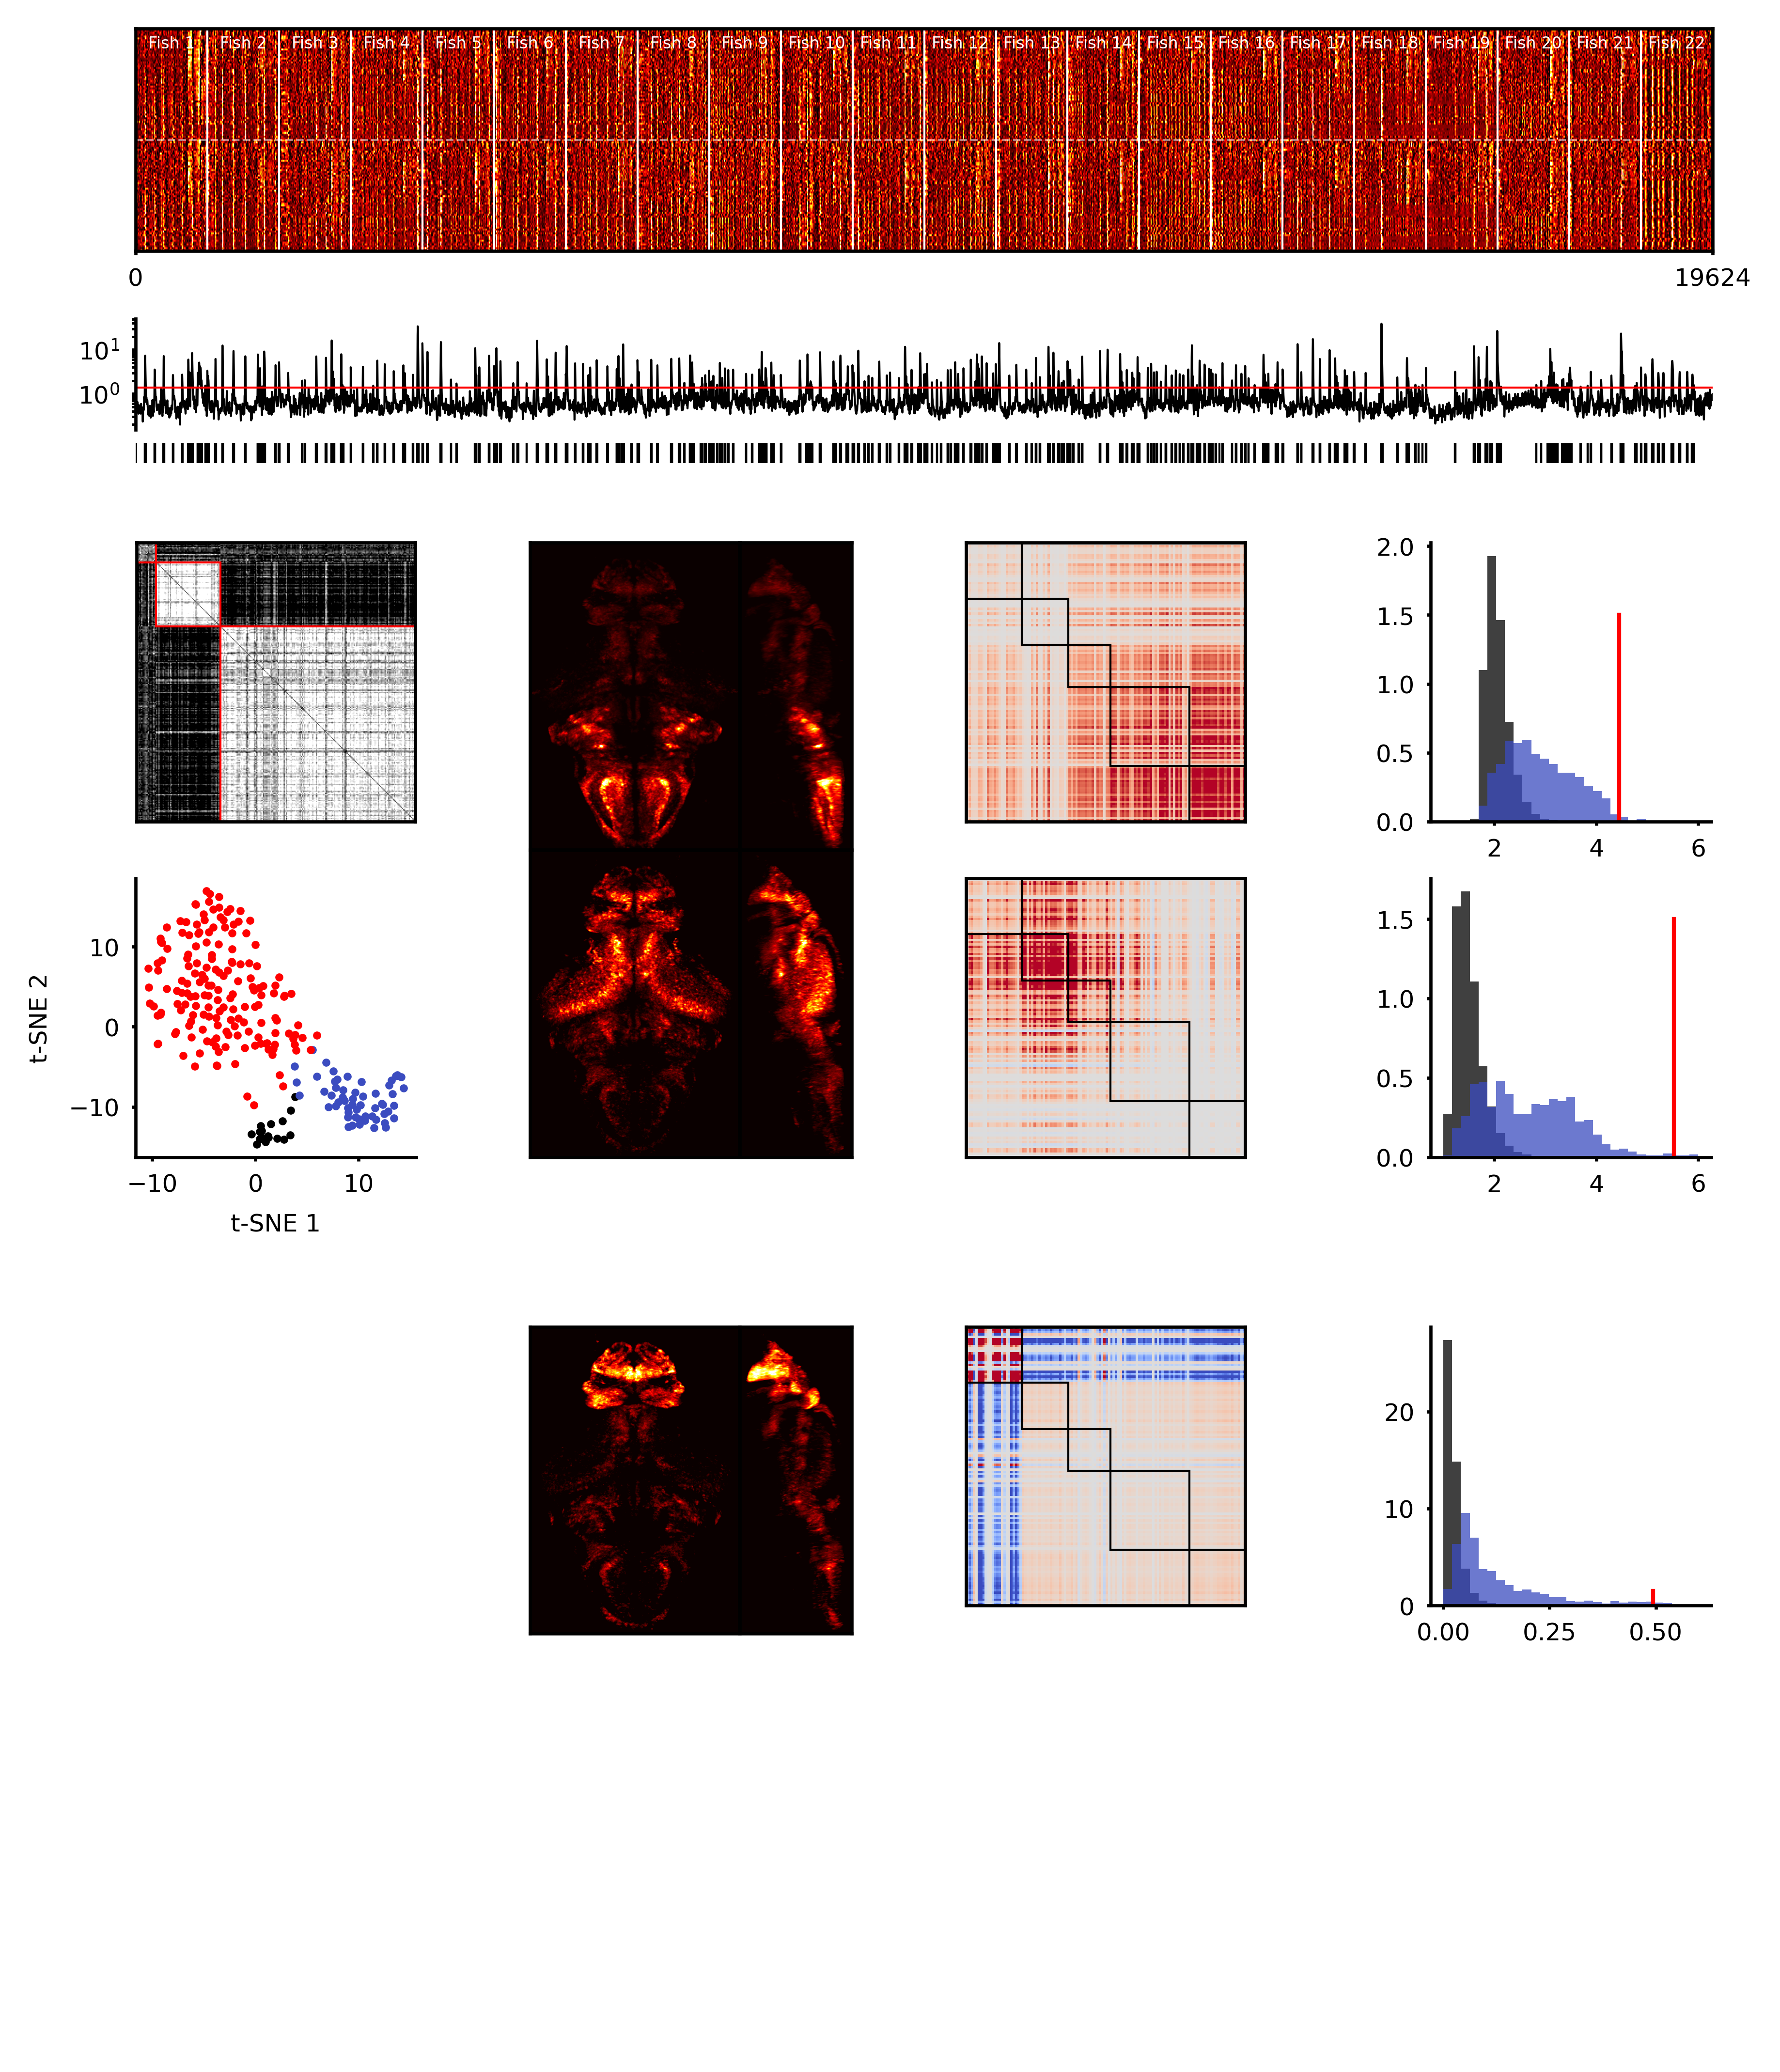

In [12]:
fig = PaperFigure(figsize=(7, 9), dpi=600)

fig.set_tick_length(1)
fig.set_font_size(6)
fig.add_background()

# Adding panels -------------------------------

fig.add_axes('state_matrix', (0, 0), 7, 1)
fig.add_axes('RMS', (0, 1.3), 7, 0.5)
fig.add_axes('RMS_events', (0, 1.8), 7, 0.2)

w = 1.25
pad = 0.25
fig.add_axes('corr_high', (0, 2.3), w, w)
fig.add_axes('embedding', (0, 2.3 + w + pad), w, w)

h = 2 * w + pad
pad = 0.5

fig.add_axes('cluster_high_motor_top', (w + pad, 2.3), 0.75 * w, h/2)
fig.add_axes('cluster_high_motor_side', (w + pad + 0.75 * w, 2.3), 0.4 * w, h/2)

fig.add_axes('cluster_high_visual_top', (w + pad, 2.3 + h/2), 0.75 * w, h/2)
fig.add_axes('cluster_high_visual_side', (w + pad + 0.75 * w, 2.3 + h/2), 0.4 * w, h/2)

fig.add_axes('coactivation1', (2.15 * w + 2 * pad, 2.3), w, w)
fig.add_axes('coactivation2', (2.15 * w + 2 * pad, 2.3 + w + 0.25), w, w)

fig.add_axes('distribution1', (7 - w, 2.3), w, w)
fig.add_axes('distribution2', (7 - w, 2.3 + w + 0.25), w, w)

delta_y = 0.5
fig.add_axes('forebrain_top', (w + pad, 2.3 + 2 * (w + 0.25) + delta_y), 0.75 * w, h/2)
fig.add_axes('forebrain_side', (w + pad + 0.75 * w, 2.3 + 2 * (w + 0.25) + delta_y), 0.4 * w, h/2)

fig.add_axes('coactivation3', (2.15 * w + 2 * pad, 2.3 + 2 * (w + 0.25) + delta_y), w, w)
fig.add_axes('distribution3', (7 - w, 2.3 + 2 * (w + 0.25) + delta_y), w, w)

# Content -------------------------------------

ax = fig.axes['state_matrix']
im = ax.imshow(state_matrix, cmap='hot', aspect='auto', vmin=-1, vmax=3)
x_values = np.linspace(0, state_matrix.shape[1], 23, endpoint=True)
for x in x_values[1:-1]:
    ax.plot([x, x], [0, state_matrix.shape[0] - 0.5], color='white', linestyle='-', linewidth=0.5)
for i, x in enumerate(x_values[1:]):
    ax.text(x - (state_matrix.shape[1] / 44), 10, 'Fish {}'.format(i + 1), ha='center', color='white', fontsize=4)
ax.plot([0, state_matrix.shape[1] - 0.5], [state_matrix.shape[0] / 2 - 0.5, state_matrix.shape[0] / 2 - 0.5], color='white', linewidth=0.5, alpha=0.5, linestyle='--')
ax.set_xticks([0, state_matrix.shape[1]])
ax.set_yticks([])
#cbar = plt.colorbar(im, ax=ax, fraction=0.005, pad=0.005)
#cbar.set_ticks([-1, 3])
#cbar.set_label('z-scored fluo.', rotation=270, labelpad=3)

ax = fig.axes['RMS']
ax.plot(RMS, color='black', linewidth=0.5)
ax.plot(RMS_threshold, color='red', linewidth=0.5)
ax.set_xlim([0, len(RMS)])
ax.set_yscale('log')
ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_xticks([])

ax = fig.axes['RMS_events']
ax.eventplot(np.where(RMS > RMS_threshold)[0], color='black', linewidth=0.5)
ax.set_xlim([0, state_matrix.shape[1]])
ax.axis('off')

colors = ['black', blue, 'red']
ax = fig.axes['embedding']
for i, c in enumerate(np.unique(clusters_high)):
    ax.scatter(embedding[clusters_high == c, 0], embedding[clusters_high == c, 1], s=1, color=colors[i])
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')

ax = fig.axes['corr_high']
im = plot_matrix_communities(ax, corr_matrix_high, clusters_high, linewidth=0.5, cmap='gray', edgecolor='red', output=True, vmin=-0.2, vmax=0.5)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['cluster_high_motor_top']
ax.imshow(projection_top_cluster3, cmap='hot', aspect='auto', vmin=vmin1, vmax=vmax1)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['cluster_high_motor_side']
ax.imshow(projection_side_cluster3, cmap='hot', aspect='auto', vmin=vmin1, vmax=vmax1)
ax.set_xlim([25, 180])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['cluster_high_visual_top']
ax.imshow(projection_top_cluster2, cmap='hot', aspect='auto', vmin=vmin2, vmax=vmax2)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['cluster_high_visual_side']
ax.imshow(projection_side_cluster2, cmap='hot', aspect='auto', vmin=vmin2, vmax=vmax2)
ax.set_xlim([25, 180])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['coactivation1']
R = cluster_centroids[0].shape[0]
cap = cluster_centroids[2].reshape(R, 1) @ cluster_centroids[2].reshape(1, R)
v = np.percentile(np.abs(cap), 95)
print(v)
plot_matrix_communities(ax, cap, communities5, vmin=-v, vmax=v, cmap='coolwarm', edgecolor='black', linewidth=0.5)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['coactivation2']
R = cluster_centroids[0].shape[0  
cap = cluster_centroids[1].reshape(R, 1) @ cluster_centroids[1].reshape(1, R)
v = np.percentile(np.abs(cap), 95)
print(v)
plot_matrix_communities(ax, cap, communities5, vmin=-v, vmax=v, cmap='coolwarm', edgecolor='black', linewidth=0.5)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['distribution1']
bins = np.linspace(1, 6, 30)
ax.hist(null2_cluster3, bins=bins, density=True, alpha=0.75, color='black')
ax.hist(null1_cluster3, bins=bins, density=True, alpha=0.75, color=blue)
ax.plot([empirical_cluster3, empirical_cluster3], [0, 1.5], color='red', linestyle='-', linewidth=1)
ax.spines[['top', 'right']].set_visible(False)

ax = fig.axes['distribution2']
bins = np.linspace(1, 6, 30)
ax.hist(null2_cluster2, bins=bins, density=True, alpha=0.75, color='black')
ax.hist(null1_cluster2, bins=bins, density=True, alpha=0.75, color=blue)
ax.plot([empirical_cluster2, empirical_cluster2], [0, 1.5], color='red', linestyle='-', linewidth=1)
ax.spines[['top', 'right']].set_visible(False)

ax = fig.axes['forebrain_top']
ax.imshow(projection_top_forebrain, cmap='hot', aspect='auto', vmin=vmin3, vmax=vmax3)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['forebrain_side']
ax.imshow(projection_side_forebrain, cmap='hot', aspect='auto', vmin=vmin3, vmax=vmax3)
ax.set_xlim([25, 180])
ax.set_ylim([850, 50])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['coactivation3']
R = cluster_centroids[0].shape[0]
cap = forebrain_active.reshape(R, 1) @ forebrain_active.reshape(1, R)
v = np.percentile(np.abs(cap), 95)
print(v)
plot_matrix_communities(ax, cap, communities5, vmin=-v, vmax=v, cmap='coolwarm', edgecolor='black', linewidth=0.5)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.axes['distribution3']
bins = np.linspace(0, 0.6, 30)
ax.hist(null2_forebrain, bins=bins, density=True, alpha=0.75, color='black')
ax.hist(null1_forebrain, bins=bins, density=True, alpha=0.75, color=blue)
ax.plot([empirical_forebrain, empirical_forebrain], [0, 1.5], color='red', linestyle='-', linewidth=1)
ax.spines[['top', 'right']].set_visible(False)

# Display -------------------------------------

fig.show()

In [51]:
fig.save('/home/anleg84/Documents/Figures/PaperNetworks2024/figure4_incomplete.svg')